In [2]:
import zipfile

zip_path = "/content/archive.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted successfully!")


Files extracted successfully!


In [3]:
import os

for item in os.listdir("/content"):
    print(item)


.config
images
archive.zip
annotations
sample_data


In [5]:
import zipfile

zip_path = "/content/archive.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Done!")


Done!


In [6]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00


In [7]:
%%writefile mask.yaml
path: /content
train: images
val: images

names:
  0: with_mask
  1: without_mask
  2: mask_weared_incorrect


Writing mask.yaml


In [9]:
!pip install lxml

import os
import xml.etree.ElementTree as ET

input_dir = "/content/annotations"
output_dir = "/content/labels"
os.makedirs(output_dir, exist_ok=True)

classes = ["with_mask", "without_mask", "mask_weared_incorrect"]

for xml_file in os.listdir(input_dir):
    if not xml_file.endswith(".xml"):
        continue

    xml_path = os.path.join(input_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    img_w = int(root.find("size/width").text)
    img_h = int(root.find("size/height").text)

    txt_name = xml_file.replace(".xml", ".txt")
    txt_path = os.path.join(output_dir, txt_name)

    with open(txt_path, "w") as f:
        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in classes:
                continue

            cls_id = classes.index(class_name)

            box = obj.find("bndbox")
            xmin = float(box.find("xmin").text)
            ymin = float(box.find("ymin").text)
            xmax = float(box.find("xmax").text)
            ymax = float(box.find("ymax").text)

            x_center = (xmin + xmax) / 2 / img_w
            y_center = (ymin + ymax) / 2 / img_h
            w = (xmax - xmin) / img_w
            h = (ymax - ymin) / img_h

            f.write(f"{cls_id} {x_center} {y_center} {w} {h}\n")

print("Conversion done! Labels saved to /content/labels")


Conversion done! Labels saved to /content/labels


In [11]:
import os

print("\labels:", len(os.listdir("/content/labels")))
print(os.listdir("/content/labels")[:10])


\labels: 853
['maksssksksss552.txt', 'maksssksksss327.txt', 'maksssksksss279.txt', 'maksssksksss548.txt', 'maksssksksss42.txt', 'maksssksksss326.txt', 'maksssksksss2.txt', 'maksssksksss290.txt', 'maksssksksss20.txt', 'maksssksksss455.txt']


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1049617603.py:3: SyntaxWarning: invalid escape sequence '\l'
  print("\labels:", len(os.listdir("/content/labels")))


In [12]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="mask.yaml",
    epochs=20,
    imgsz=416,
    batch=16
)


Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=mask.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a16f4e0f9e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/try.jpg: 256x416 3 with_masks, 2 without_masks, 1 mask_weared_incorrect, 121.0ms
Speed: 2.7ms preprocess, 121.0ms inference, 9.2ms postprocess per image at shape (1, 3, 256, 416)
Results saved to /content/runs/detect/predict


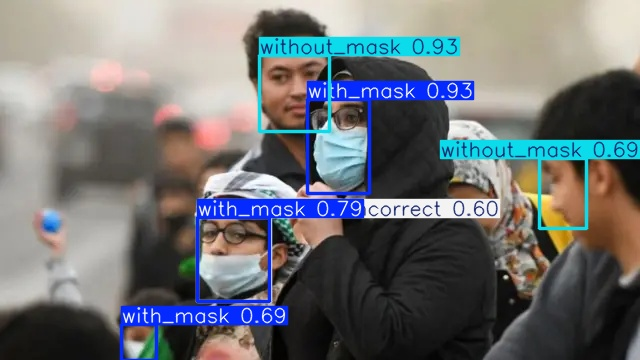

In [13]:
from ultralytics import YOLO
from IPython.display import Image, display

model = YOLO("/content/runs/detect/train2/weights/best.pt")

results = model.predict("/content/try.jpg", save=True)

display(Image(filename=results[0].save_dir + "/try.jpg"))
